In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data=pd.read_csv('emissions_reduction_data.csv')
data.head()

,energy_efficiency,renewable_ratio,technology_cost,emission_reduction
0,68.727006,0.373641,7569.984799,0
1,97.535715,0.332912,2660.607960,0
2,86.599697,0.176154,4119.757249,0
3,79.932924,0.607267,6969.525732,1
4,57.800932,0.476624,5338.804101,0


In [ ]:
data.shape

(10000, 4)

In [ ]:
data.isnull().sum()

,0
energy_efficiency,0
renewable_ratio,0
technology_cost,0
emission_reduction,0


In [ ]:
data['emission_reduction'].value_counts()

,count
emission_reduction,
0,8321
1,1679


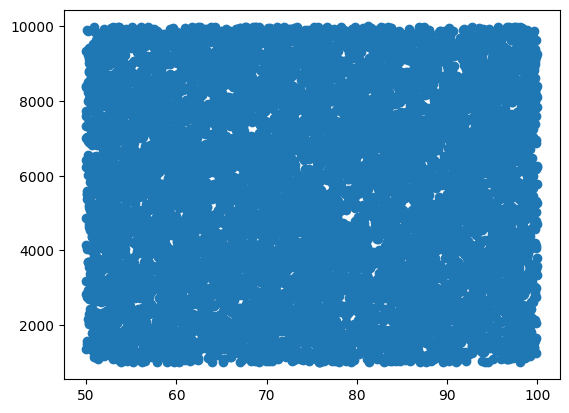

In [ ]:
plt.scatter(data['energy_efficiency'],data['technology_cost'])
plt.show()

In [ ]:
x=data[['energy_efficiency','renewable_ratio','technology_cost']]
y=data['emission_reduction']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
k=5
model=KNeighborsClassifier(n_neighbors=k)
model.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred=model.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.99

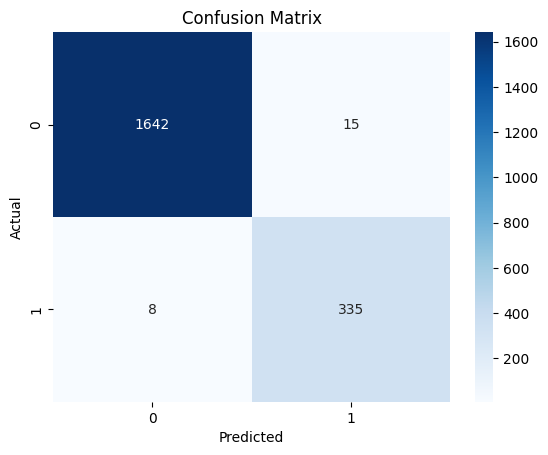

In [ ]:
conf_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues')
xticklabels=['Not Effective','Effective']
yticklabels=['Not Effective','Effective']
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [ ]:
print(classification_report(y_test, y_pred,target_names=['Not effective','Effective']))

               precision    recall  f1-score   support

Not effective       1.00      0.99      0.99      1657
    Effective       0.96      0.98      0.97       343

     accuracy                           0.99      2000
    macro avg       0.98      0.98      0.98      2000
 weighted avg       0.99      0.99      0.99      2000



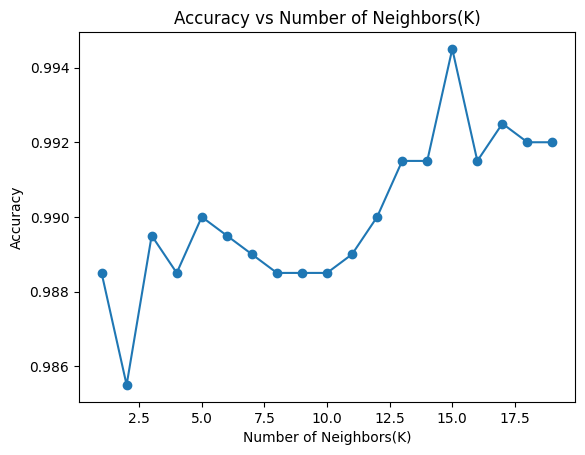

In [ ]:
# Trying different values of k
from sklearn.metrics import accuracy_score # Re-import to ensure accuracy_score refers to the function

accuracy_values = [] # Changed list name to avoid shadowing
k_values = range(1, 20)

for k in k_values:
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  accuracy_values.append(accuracy_score(y_test, y_pred)) # Call the function and append to the correct list

plt.plot(k_values, accuracy_values, marker='o')
plt.xlabel('Number of Neighbors(K)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Neighbors(K)')
plt.show()